In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/concrete/concrete.csv")
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [2]:
train_cols = df.columns[:8]
X = df[train_cols]
y = df["class"]

In [3]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["class"])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [4]:
X = df_samp[train_cols]
y = df_samp["class"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
from keras.layers import Dense
from tensorflow.keras.models import Sequential

# class child(parent)
class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers, num_classes):
        super(MyModel, self).__init__(name='my_model') # super()는 상위클래스의 초기화함수 호출
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        # self.add(Dropout(0.2))
        self.add(Dense(num_classes, activation='sigmoid'))
    
model = MyModel(len(X_train.columns), [128,64,32], 1)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

2021-12-28 11:10:27.398435: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot:>

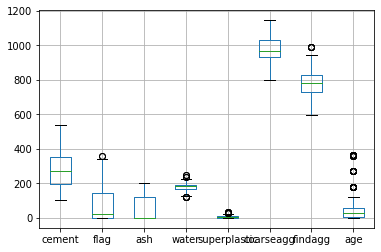

In [7]:
X_train.boxplot()

<AxesSubplot:>

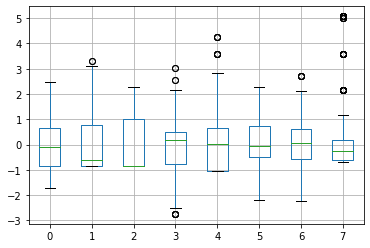

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

X_train_scaled.boxplot()

In [10]:
hist = model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
26/26 [==============================] - 1s 1ms/step - loss: 0.2135 - accuracy: 0.6991
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.8187
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.8434
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.8619
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.8681
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.8718
Epoch 7/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.8718
Epoch 8/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.8829
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.8952
Epoch 10/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.8841
Epoch 11/

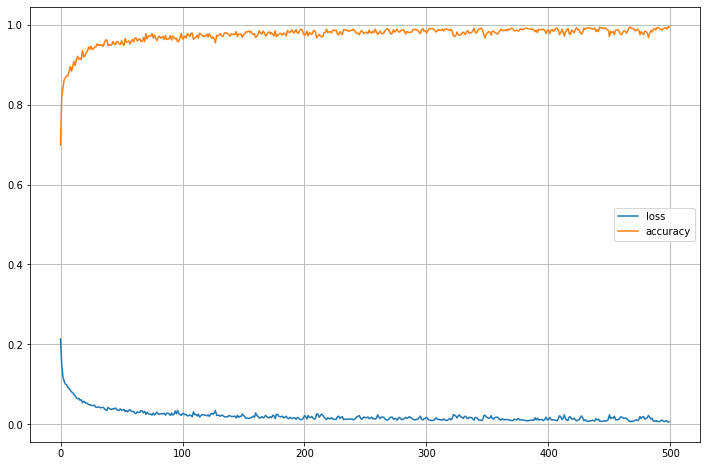

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [12]:
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

26/26 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9951
[0.005515734199434519, 0.995067834854126]
accuracy: 99.51%
7/7 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9113
[0.0684506893157959, 0.9113300442695618]
accuracy: 91.13%


In [13]:
pred = model.predict(X_test_scaled)
y_pred = []
for pr in pred:
    if pr >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(y_pred)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[90, 10],
       [ 8, 95]])

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.90      0.92      0.91       103

    accuracy                           0.91       203
   macro avg       0.91      0.91      0.91       203
weighted avg       0.91      0.91      0.91       203



In [ ]:
# 284로 가서 파이참 실습하고 돌아온대 ~~